In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 

In [3]:
df = pd.read_csv('/Users/user/Desktop/ashish/dataframes/titanic.csv')

In [4]:
df.head(5)

,Unnamed: 0,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [5]:
categorical_feature= ['Sex','Pclass','Siblings/Spouses Aboard']
class_feature = ['Survived']
new_df = df[categorical_feature]
new_df['Survived']  = df[class_feature]
new_df

/var/folders/0s/mb0_47nd00vb9xhzh52jg6z00000gn/T/ipykernel_33111/1915944705.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Survived']  = df[class_feature]


,Sex,Pclass,Siblings/Spouses Aboard,Survived
0,male,3,1,0
1,female,1,1,1
2,female,3,0,1
3,female,1,1,1
4,male,3,0,0
...,...,...,...,...
882,male,2,0,0
883,female,1,0,1
884,female,3,1,0
885,male,1,0,1


In [6]:
from sklearn.preprocessing import LabelEncoder 
import warnings
warnings.filterwarnings('ignore')
le = LabelEncoder () 

for i in new_df.columns : 
    new_df[i] = le.fit_transform(df[[i]])

new_df 

,Sex,Pclass,Siblings/Spouses Aboard,Survived
0,1,2,1,0
1,0,0,1,1
2,0,2,0,1
3,0,0,1,1
4,1,2,0,0
...,...,...,...,...
882,1,1,0,0
883,0,0,0,1
884,0,2,1,0
885,1,0,0,1


In [7]:
X = new_df.iloc[:,:-1]
y = new_df['Survived']

from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test = train_test_split(
X,y,test_size = 0.3, random_state= 42)

X_train.shape,y_train.shape

((620, 3), (620,))

In [8]:
X_train.isnull().sum()

Sex                        0
Pclass                     0
Siblings/Spouses Aboard    0
dtype: int64

In [10]:
#. chi2 method return the 2 values : 
# f1 score and other is p value : 

from sklearn.feature_selection import chi2 
f_score , p_value = chi2(X_train,y_train) 
print(f_score)
print(p_value) 

[78.03426253 39.49780071  2.89210324]
[1.01268671e-18 3.28429098e-10 8.90146503e-02]


In [16]:
f_score_ = pd.Series(f_score , index = X_train.columns ) 
p_val = pd.Series( p_value , index = X_train.columns) 
# lower the p value is more important that feature  is : 
import seaborn as sns

<Axes: >

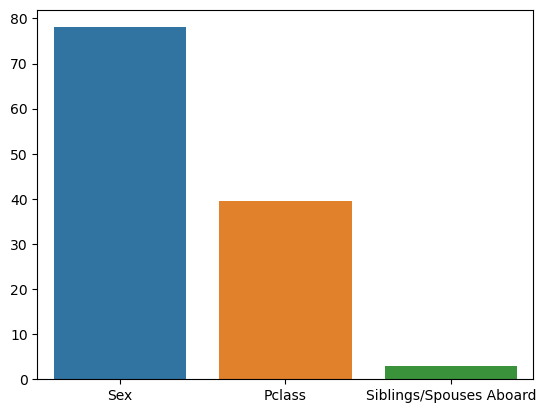

In [17]:
sns.barplot( x= f_score_.index , y= f_score) 

In [34]:
p_val.sort_values(ascending= True)

Sex                        1.012687e-18
Pclass                     3.284291e-10
Siblings/Spouses Aboard    8.901465e-02
dtype: float64

In [35]:
# p values is defining that : 
# it is the probebility of the association between the categorical 
# data is made by chance alone  ( or made my accident )  

# more p value  = association made by accident , it means 
#                      no segnificant. association  : 

#. less p values =  association is not made by accident , it measn
                     # there is significant association :
    
# it means less P values means stronger associatino between given 
# variable :

In [36]:
# so hear smallest value is Sex ( 10)rest to -18  :
# thare is low probebility to association made by accident between 2 feature 

# hear sex is the more significant feature according to chi2 method

In [38]:
p_val.min()

1.0126867090098989e-18